In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
train_data_dir = "./dataset/data1/training_set/"
test_data_dir = "./dataset/data1/test_set/"
im_width, im_height = 600, 600

In [3]:
classes = {}
for i in os.listdir(train_data_dir):
    classes[i] = os.listdir(train_data_dir).index(i)
classes

{'Agreeableness': 0,
 'Conscientiousness': 1,
 'Extraversion': 2,
 'Neuroticism': 3,
 'Openness': 4}

In [4]:
train_data = {"image": [], "class": []}
for i in os.listdir(train_data_dir):
    for file in os.listdir(os.path.join(train_data_dir, i)):
        train_data["image"].append(os.path.join(train_data_dir, i, file).replace("\\", "/"))
        train_data["class"].append(i)


test_data = {"image": [], "class": []}
for i in os.listdir(test_data_dir):
    for file in os.listdir(os.path.join(test_data_dir, i)):
        test_data["image"].append(os.path.join(test_data_dir, i, file).replace("\\", "/"))
        test_data["class"].append(i)

In [5]:
train_data = pd.DataFrame(train_data)
train_data.head()

,image,class
0,./dataset/data1/training_set/Agreeableness/anu...,Agreeableness
1,./dataset/data1/training_set/Agreeableness/anu...,Agreeableness
2,./dataset/data1/training_set/Agreeableness/IMG...,Agreeableness
3,./dataset/data1/training_set/Agreeableness/IMG...,Agreeableness
4,./dataset/data1/training_set/Agreeableness/IMG...,Agreeableness


In [6]:
test_data = pd.DataFrame(test_data)
test_data.head()

,image,class
0,./dataset/data1/test_set/Agreeableness/IMG_202...,Agreeableness
1,./dataset/data1/test_set/Agreeableness/IMG_202...,Agreeableness
2,./dataset/data1/test_set/Agreeableness/IMG_202...,Agreeableness
3,./dataset/data1/test_set/Agreeableness/IMG_202...,Agreeableness
4,./dataset/data1/test_set/Agreeableness/IMG_202...,Agreeableness


In [7]:
print(train_data.shape)
print(test_data.shape)

(177, 2)
(44, 2)


In [8]:
import cv2 as cv
import matplotlib.pyplot as plt

In [9]:
from package.features import get_line_slant, get_letter_slant

x_train = []
y_train = []
for i in range(train_data.shape[0]):
    iminfo = []
    print("\r{:3d}/{:3d} processed".format(i+1, train_data.shape[0]), end="")
    iminfo.append(get_letter_slant(image_path=train_data.image.tolist()[i]))
    iminfo.append(get_line_slant(image_path=train_data.image.tolist()[i])[0])
    x_train.append(iminfo)
    y_train.append([train_data["class"].tolist()[i]])

print()
x_test = []
y_test = []
for i in range(test_data.shape[0]):
    iminfo = []
    print("\r{:3d}/{:3d} processed".format(i+1, test_data.shape[0]), end="")
    iminfo.append(get_letter_slant(image_path=test_data.image.tolist()[i]))
    iminfo.append(get_line_slant(image_path=test_data.image.tolist()[i])[0])
    x_test.append(iminfo)
    y_test.append([test_data["class"].tolist()[i]])

177/177 processed
 44/177 processed

In [10]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [11]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(2,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(5, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                192       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 5)                 85        
                                                                 
Total params: 2,885
Trainable params: 2,885
Non-trainable params: 0
_________________________________________________________________


In [20]:
# model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
from keras import optimizers
model.compile(
    optimizers.RMSprop(learning_rate=0.0001),
    loss="mean_squared_error",
    metrics=["accuracy"]
)

In [21]:
epoch = 100
history = model.fit(x_train, y_train, epochs=epoch, callbacks=None, validation_data=(x_test, y_test))

Epoch 1/100
6/6 [==============================] - 2s 64ms/step - loss: 8.0562 - accuracy: 0.4124 - val_loss: 7.6101 - val_accuracy: 0.2955
Epoch 2/100
6/6 [==============================] - 0s 15ms/step - loss: 8.0532 - accuracy: 0.4181 - val_loss: 7.6090 - val_accuracy: 0.2727
Epoch 3/100
6/6 [==============================] - 0s 16ms/step - loss: 8.0518 - accuracy: 0.4124 - val_loss: 7.6082 - val_accuracy: 0.2273
Epoch 4/100
6/6 [==============================] - 0s 16ms/step - loss: 8.0509 - accuracy: 0.3842 - val_loss: 7.6076 - val_accuracy: 0.2500
Epoch 5/100
6/6 [==============================] - 0s 17ms/step - loss: 8.0502 - accuracy: 0.3785 - val_loss: 7.6070 - val_accuracy: 0.2273
Epoch 6/100
6/6 [==============================] - 0s 16ms/step - loss: 8.0496 - accuracy: 0.3672 - val_loss: 7.6067 - val_accuracy: 0.2045
Epoch 7/100
6/6 [==============================] - 0s 18ms/step - loss: 8.0491 - accuracy: 0.3955 - val_loss: 7.6063 - val_accuracy: 0.2045
Epoch 8/100
6/6 [===

In [22]:
scores = model.evaluate(x_train, y_train)
scores

6/6 [==============================] - 0s 4ms/step - loss: 8.0457 - accuracy: 0.1469


[8.045659065246582, 0.14689265191555023]

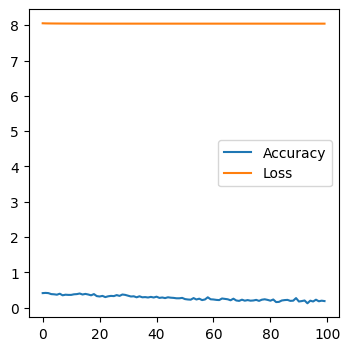

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 4))
plt.plot(range(epoch), history.history['accuracy'], label="Accuracy")
plt.plot(range(epoch), history.history['loss'], label="Loss")
# plt.plot(range(epoch), history.history['val_accuracy'], label="Val Accuracy")
# plt.plot(range(epoch), history.history['val_loss'], label=" Val Loss")
plt.legend(loc="best")
plt.show()

In [24]:
classes

{'Agreeableness': 0,
 'Conscientiousness': 1,
 'Extraversion': 2,
 'Neuroticism': 3,
 'Openness': 4}

1/1 [==============================] - 0s 43ms/step


array([1], dtype=int64)

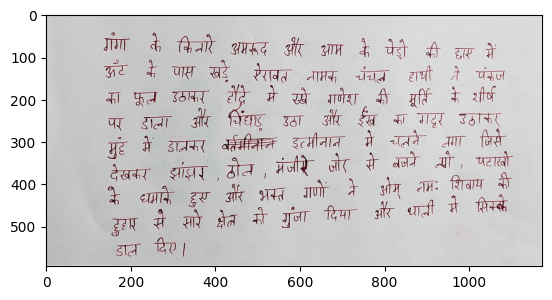

In [31]:
image = "./dataset/dataset/test_set/Agreeableness/subodhkumR18.JPG"
letter_slant = get_letter_slant(image)
line_slant = get_line_slant(image)
plt.imshow(cv.imread(image))
input_data = np.array([[letter_slant, line_slant]])
predict_data = model.predict(input_data)
max_pred = np.argmax(predict_data, axis=1)
max_pred